# Evaluation

This Jupyter notebook contains the evaluation of the triple classification models. All plots that are part of the evaluation section in the Master's Thesis are created here.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Evaluation of macro-averaged scores

The evaluation below uses macro-averaged scores over all relations.

In [2]:
def get_all_average_scores(model_names):
    average_scores_val = pd.DataFrame()
    average_scores_test = pd.DataFrame()
    for MODEL_NAME in model_names:
        SCORES_DIR = f"../data/predictions/{MODEL_NAME}/"
        VAL_EVAL_NO_FILTER_FILEPATH = f"{SCORES_DIR}val_evaluation_no_filter.csv"
        TEST_EVAL_NO_FILTER_FILEPATH = f"{SCORES_DIR}test_evaluation_no_filter.csv"
        VAL_EVAL_TBF_FILEPATH = f"{SCORES_DIR}val_evaluation_tbf.csv"
        TEST_EVAL_TBF_FILEPATH = f"{SCORES_DIR}test_evaluation_tbf.csv"
        VAL_EVAL_TAF_FILEPATH = f"{SCORES_DIR}val_evaluation_taf.csv"
        TEST_EVAL_TAF_FILEPATH = f"{SCORES_DIR}test_evaluation_taf.csv"
        val_eval_no_filter = pd.read_csv(VAL_EVAL_NO_FILTER_FILEPATH)
        test_eval_no_filter = pd.read_csv(TEST_EVAL_NO_FILTER_FILEPATH)
        val_eval_tbf = pd.read_csv(VAL_EVAL_TBF_FILEPATH)
        test_eval_tbf = pd.read_csv(TEST_EVAL_TBF_FILEPATH)
        val_eval_taf = pd.read_csv(VAL_EVAL_TAF_FILEPATH)
        test_eval_taf = pd.read_csv(TEST_EVAL_TAF_FILEPATH)
        average_scores_val = pd.concat([
            average_scores_val,
            pd.concat([
                val_eval_no_filter[["accuracy", "precision", "recall", "f1"]].mean().rename(f"{MODEL_NAME}_no_filter"),
                val_eval_tbf[["accuracy", "precision", "recall", "f1"]].mean().rename(f"{MODEL_NAME}_tbf"),
                val_eval_taf[["accuracy", "precision", "recall", "f1"]].mean().rename(f"{MODEL_NAME}_taf")
            ], axis=1)
        ], axis=1)
        average_scores_test = pd.concat([
            average_scores_test,
            pd.concat([
                test_eval_no_filter[["accuracy", "precision", "recall", "f1"]].mean().rename(f"{MODEL_NAME}_no_filter"),
                test_eval_tbf[["accuracy", "precision", "recall", "f1"]].mean().rename(f"{MODEL_NAME}_tbf"),
                test_eval_taf[["accuracy", "precision", "recall", "f1"]].mean().rename(f"{MODEL_NAME}_taf")
            ], axis=1)
        ], axis=1)
    average_scores_val = average_scores_val.transpose()
    average_scores_test = average_scores_test.transpose()

    return average_scores_val, average_scores_test

In [3]:
model_names = [
    "transE_bordes_ht",
    "transE_bordes_hrt",
    "transE_ruffinelli_ht_makeshift_preds",
    "transE_ruffinelli_hrt_makeshift_preds",
    "complEx_trouillon_ht",
    "complEx_trouillon_hrt",
    "complEx_ruffinelli_ht_makeshift_preds",
    "complEx_ruffinelli_hrt_makeshift_preds"
]

average_scores_val, average_scores_test = get_all_average_scores(model_names)

In [4]:
def filtering_type(model_name):
    if model_name[-3:] == "ter":
        return "no_filter"
    elif model_name[-3:] == "tbf":
        return "tbf"
    elif model_name[-3:] == "taf":
        return "taf"
    else:
        return None
    
average_scores_test["filtering_type"] = average_scores_test.index.map(filtering_type)

Below, the evaluation results of all model variations are shown, first without filtering, then with filtering and threshold determination before filtering and finally with filtering and threshold determination after filtering.

In [5]:
average_scores_test[average_scores_test["filtering_type"] == "no_filter"]

,accuracy,precision,recall,f1,filtering_type
transE_bordes_ht_no_filter,0.996385,0.073920,0.003525,0.005613,no_filter
transE_bordes_hrt_no_filter,0.996416,0.066972,0.003435,0.005450,no_filter
transE_ruffinelli_ht_makeshift_preds_no_filter,0.994810,0.073042,0.012515,0.014802,no_filter
transE_ruffinelli_hrt_makeshift_preds_no_filter,0.995249,0.126059,0.011191,0.016062,no_filter
complEx_trouillon_ht_no_filter,0.996438,0.000000,0.000000,0.000000,no_filter
complEx_trouillon_hrt_no_filter,0.996455,0.057924,0.006278,0.009947,no_filter
complEx_ruffinelli_ht_makeshift_preds_no_filter,0.996706,0.189399,0.019769,0.029384,no_filter
complEx_ruffinelli_hrt_makeshift_preds_no_filter,0.996662,0.239464,0.018142,0.027861,no_filter


In [6]:
average_scores_test[average_scores_test["filtering_type"] == "tbf"]

,accuracy,precision,recall,f1,filtering_type
transE_bordes_ht_tbf,0.996420,0.081879,0.003525,0.005662,tbf
transE_bordes_hrt_tbf,0.996424,0.073898,0.003432,0.005454,tbf
transE_ruffinelli_ht_makeshift_preds_tbf,0.996002,0.089674,0.011507,0.015794,tbf
transE_ruffinelli_hrt_makeshift_preds_tbf,0.996061,0.138760,0.010514,0.016187,tbf
complEx_trouillon_ht_tbf,0.996439,0.000000,0.000000,0.000000,tbf
complEx_trouillon_hrt_tbf,0.996465,0.076899,0.006274,0.010334,tbf
complEx_ruffinelli_ht_makeshift_preds_tbf,0.996715,0.222051,0.019698,0.029691,tbf
complEx_ruffinelli_hrt_makeshift_preds_tbf,0.996670,0.273899,0.018075,0.028125,tbf


In [7]:
average_scores_test[average_scores_test["filtering_type"] == "taf"]

,accuracy,precision,recall,f1,filtering_type
transE_bordes_ht_taf,0.996545,0.089037,0.014754,0.015740,taf
transE_bordes_hrt_taf,0.996542,0.088060,0.014171,0.014791,taf
transE_ruffinelli_ht_makeshift_preds_taf,0.996257,0.092906,0.035907,0.041131,taf
transE_ruffinelli_hrt_makeshift_preds_taf,0.996286,0.155936,0.036934,0.046750,taf
complEx_trouillon_ht_taf,0.996478,0.019495,0.005287,0.006351,taf
complEx_trouillon_hrt_taf,0.996463,0.161373,0.012600,0.017448,taf
complEx_ruffinelli_ht_makeshift_preds_taf,0.996851,0.287743,0.049424,0.068364,taf
complEx_ruffinelli_hrt_makeshift_preds_taf,0.996802,0.335163,0.040344,0.057696,taf


The precision and recall scores are plottet in a bar chart.

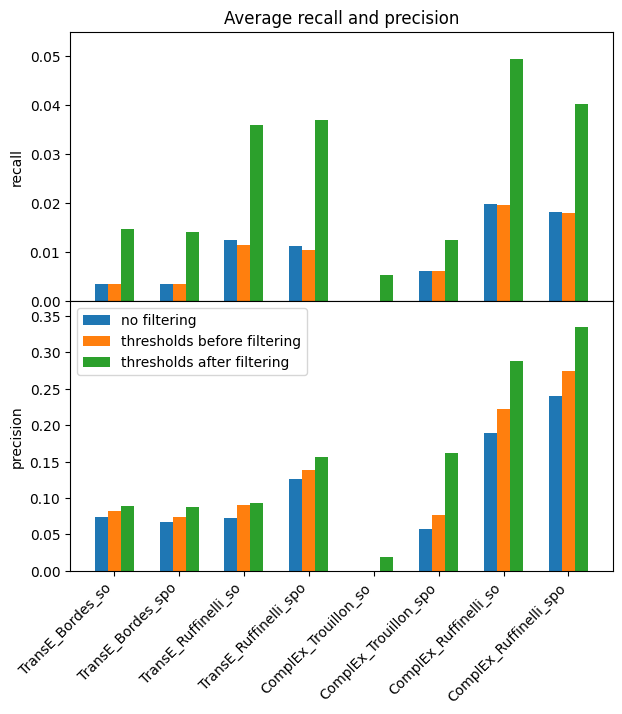

In [8]:
fig, axs = plt.subplots(nrows=2, sharex=True, figsize=(7, 7))

model_names_plot = [
    "TransE_Bordes_so",
    "TransE_Bordes_spo",
    "TransE_Ruffinelli_so",
    "TransE_Ruffinelli_spo",
    "ComplEx_Trouillon_so",
    "ComplEx_Trouillon_spo",
    "ComplEx_Ruffinelli_so",
    "ComplEx_Ruffinelli_spo"
]

recall_no_filter = average_scores_test[average_scores_test["filtering_type"] == "no_filter"]["recall"]
recall_tbf = average_scores_test[average_scores_test["filtering_type"] == "tbf"]["recall"]
recall_taf = average_scores_test[average_scores_test["filtering_type"] == "taf"]["recall"]
x = np.arange(len(recall_no_filter))

axs[0].bar(x-0.2, recall_no_filter, width=0.2)
axs[0].bar(x, recall_tbf, width=0.2)
axs[0].bar(x+0.2, recall_taf, width=0.2)
axs[0].set_ylim([0, 0.055])
axs[0].set_ylabel("recall")

precision_no_filter = average_scores_test[average_scores_test["filtering_type"] == "no_filter"]["precision"]
precision_tbf = average_scores_test[average_scores_test["filtering_type"] == "tbf"]["precision"]
precision_taf = average_scores_test[average_scores_test["filtering_type"] == "taf"]["precision"]
x = np.arange(len(precision_no_filter))

axs[1].bar(x-0.2, precision_no_filter, width=0.2, label="no filtering")
axs[1].bar(x, precision_tbf, width=0.2, label="thresholds before filtering")
axs[1].bar(x+0.2, precision_taf, width=0.2, label="thresholds after filtering")
axs[1].set_ylim([0, 0.37])
axs[1].set_ylabel("precision")
axs[1].set_xticks(x)
axs[1].set_xticklabels(model_names_plot, rotation=45, horizontalalignment="right")
axs[1].legend()

axs[0].set_title("Average recall and precision")

fig.subplots_adjust(hspace=0)

plt.show()

## Relation-Specific Evaluation

The evaluations below concider the relation-specific scores and explore their differences and possible reasons for the differences. The evaluation scores all relate to the model **ComplEx_Ruffinelli_spo with relation filtering and threshold determination after filtering**.

In [9]:
def get_all_scores(model_names, metric):
    scores_val = pd.DataFrame()
    scores_test = pd.DataFrame()
    for MODEL_NAME in model_names:
        SCORES_DIR = f"../data/predictions/{MODEL_NAME}/"
        VAL_EVAL_NO_FILTER_FILEPATH = f"{SCORES_DIR}val_evaluation_no_filter.csv"
        TEST_EVAL_NO_FILTER_FILEPATH = f"{SCORES_DIR}test_evaluation_no_filter.csv"
        VAL_EVAL_TBF_FILEPATH = f"{SCORES_DIR}val_evaluation_tbf.csv"
        TEST_EVAL_TBF_FILEPATH = f"{SCORES_DIR}test_evaluation_tbf.csv"
        VAL_EVAL_TAF_FILEPATH = f"{SCORES_DIR}val_evaluation_taf.csv"
        TEST_EVAL_TAF_FILEPATH = f"{SCORES_DIR}test_evaluation_taf.csv"
        val_eval_no_filter = pd.read_csv(VAL_EVAL_NO_FILTER_FILEPATH)
        test_eval_no_filter = pd.read_csv(TEST_EVAL_NO_FILTER_FILEPATH)
        val_eval_tbf = pd.read_csv(VAL_EVAL_TBF_FILEPATH)
        test_eval_tbf = pd.read_csv(TEST_EVAL_TBF_FILEPATH)
        val_eval_taf = pd.read_csv(VAL_EVAL_TAF_FILEPATH)
        test_eval_taf = pd.read_csv(TEST_EVAL_TAF_FILEPATH)
        
        scores_val = pd.concat([
            scores_val,
            pd.concat([
                val_eval_no_filter[metric].rename(f"{MODEL_NAME}_no_filter"),
                val_eval_tbf[metric].rename(f"{MODEL_NAME}_tbf"),
                val_eval_taf[metric].rename(f"{MODEL_NAME}_taf")
            ], axis=1)
        ], axis=1)
        scores_test = pd.concat([
            scores_test,
            pd.concat([
                test_eval_no_filter[metric].rename(f"{MODEL_NAME}_no_filter"),
                test_eval_tbf[metric].rename(f"{MODEL_NAME}_tbf"),
                test_eval_taf[metric].rename(f"{MODEL_NAME}_taf")
            ], axis=1)
        ], axis=1)
        
    return scores_val, scores_test

In [10]:
recall_val, recall_test = get_all_scores(model_names, "recall")
precision_val, precision_test = get_all_scores(model_names, "precision")
accuracy_val, accuracy_test = get_all_scores(model_names, "accuracy")
f1_val, f1_test = get_all_scores(model_names, "f1")

Below, the recall and precision values per relation are plotted in a scatter plot. The histograms at the x- and y-axis help visualize the distributions of the scores.

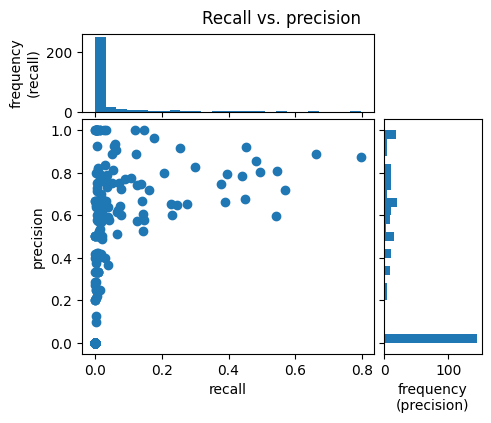

In [11]:
fig = plt.figure(figsize=(5, 4))

gs = fig.add_gridspec(2, 2,  width_ratios=(3, 1), height_ratios=(1, 3),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)

ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)

ax.scatter(recall_test["complEx_ruffinelli_hrt_makeshift_preds_taf"], precision_test["complEx_ruffinelli_hrt_makeshift_preds_taf"])
ax.set_xlabel("recall")
ax.set_ylabel("precision")

recall_test["complEx_ruffinelli_hrt_makeshift_preds_taf"].plot(
    kind="hist",
    bins=25,
    ax=ax_histx
)
ax_histx.set_ylabel("frequency\n(recall)")

precision_test["complEx_ruffinelli_hrt_makeshift_preds_taf"].plot(
    kind="hist",
    bins=25,
    ax=ax_histy,
    orientation="horizontal"
)
ax_histy.set_xlabel("frequency\n(precision)")

plt.suptitle("Recall vs. precision", y=0.96)

plt.show()

In [12]:
MODEL_NAME = "complEx_ruffinelli_hrt_makeshift_preds"
SCORES_DIR = f"../data/predictions/{MODEL_NAME}/"
TEST_EVAL_TAF_FILEPATH = f"{SCORES_DIR}test_evaluation_taf.csv"

test_eval_taf = pd.read_csv(TEST_EVAL_TAF_FILEPATH)

In [13]:
# relationship between number of triples per relation (testing / validation set) and recall

val_matrix = pd.read_csv("../data/processed_data/val_matrix.csv")
props = np.setdiff1d(val_matrix.columns, ["subject", "object"])
n_triples_val = val_matrix[props].sum()
n_triples_val = n_triples_val.rename("n_triples_val")

training_triples = pd.read_csv("../data/processed_data/train.tsv", sep="\t", names=["subject", "predicate", "object"])
n_triples_train = training_triples["predicate"].value_counts()
n_triples_train = n_triples_train.rename("n_triples_train")

test_eval_taf = test_eval_taf.merge(n_triples_val, left_on="property", right_index=True)
test_eval_taf = test_eval_taf.merge(n_triples_train, left_on="property", right_index=True)

Below, the relationship between the number of positive triples per relation in the training and validation datasets and the according recall scores is plotted.

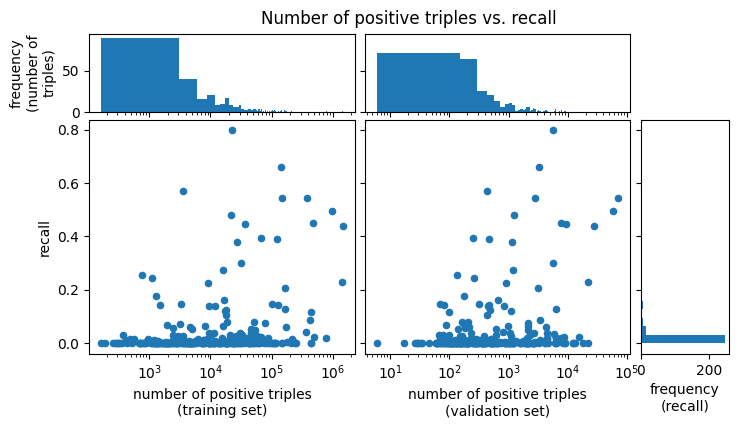

In [14]:
fig = plt.figure(figsize=(8, 4))

gs = fig.add_gridspec(2, 3,  width_ratios=(3, 3, 1), height_ratios=(1, 3),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)

ax1 = fig.add_subplot(gs[1, 0])
ax1_histx = fig.add_subplot(gs[0, 0], sharex=ax1)

test_eval_taf.plot(
    kind="scatter",
    x="n_triples_train",
    y="recall",
    logx=True,
    ax=ax1
)
ax1.set_xlabel("number of positive triples\n(training set)")
ax1.set_ylabel("recall")

test_eval_taf["n_triples_train"].plot(
    kind="hist",
    bins=500,
    ax=ax1_histx
)
ax1_histx.set_ylabel("frequency\n(number of\ntriples)")


ax2 = fig.add_subplot(gs[1, 1])
ax2_histx = fig.add_subplot(gs[0, 1], sharex=ax2, sharey=ax1_histx)
ax2_histy = fig.add_subplot(gs[1, 2], sharey=ax2)

test_eval_taf.plot(
    kind="scatter",
    x="n_triples_val",
    y="recall",
    logx=True,
    ax=ax2
)
ax2.set_xlabel("number of positive triples\n(validation set)")

test_eval_taf["n_triples_val"].plot(
    kind="hist",
    bins=500,
    ax=ax2_histx
)
ax2_histx.set_ylabel("frequency\n(number of triples)")

test_eval_taf["recall"].plot(
    kind="hist",
    bins=25,
    ax=ax2_histy,
    orientation="horizontal"
)
ax2_histy.set_xlabel("frequency\n(recall)")

plt.suptitle("Number of positive triples vs. recall", y=0.96)

plt.show()

Analogously, the relationship between the number of positive triples and the precision scores is visualized.

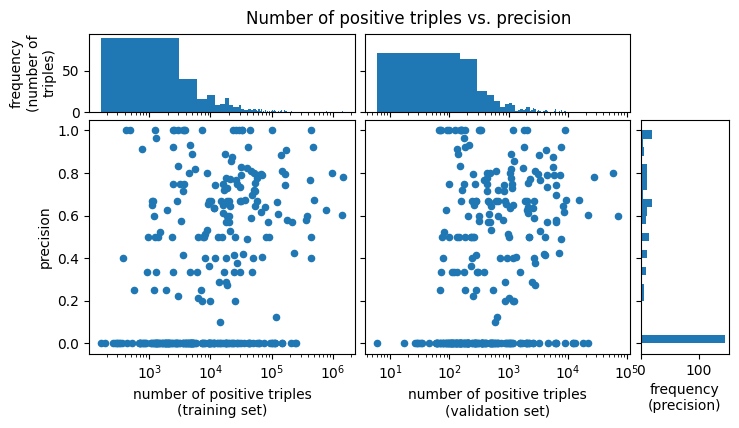

In [15]:
fig = plt.figure(figsize=(8, 4))

gs = fig.add_gridspec(2, 3,  width_ratios=(3, 3, 1), height_ratios=(1, 3),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)

ax1 = fig.add_subplot(gs[1, 0])
ax1_histx = fig.add_subplot(gs[0, 0], sharex=ax1)

test_eval_taf.plot(
    kind="scatter",
    x="n_triples_train",
    y="precision",
    logx=True,
    ax=ax1
)
ax1.set_xlabel("number of positive triples\n(training set)")
ax1.set_ylabel("precision")

test_eval_taf["n_triples_train"].plot(
    kind="hist",
    bins=500,
    ax=ax1_histx
)
ax1_histx.set_ylabel("frequency\n(number of\ntriples)")


ax2 = fig.add_subplot(gs[1, 1])
ax2_histx = fig.add_subplot(gs[0, 1], sharex=ax2, sharey=ax1_histx)
ax2_histy = fig.add_subplot(gs[1, 2], sharey=ax2)

test_eval_taf.plot(
    kind="scatter",
    x="n_triples_val",
    y="precision",
    logx=True,
    ax=ax2
)
ax2.set_xlabel("number of positive triples\n(validation set)")

test_eval_taf["n_triples_val"].plot(
    kind="hist",
    bins=500,
    ax=ax2_histx
)
ax2_histx.set_ylabel("frequency\n(number of triples)")

test_eval_taf["precision"].plot(
    kind="hist",
    bins=25,
    ax=ax2_histy,
    orientation="horizontal"
)
ax2_histy.set_xlabel("frequency\n(precision)")

plt.suptitle("Number of positive triples vs. precision", y=0.96)

plt.show()

Below, the relationship between successful relationship filtering and recall and precision scores is visualized.

In [16]:
# add column that indicates if filtering was applied
val_filter = pd.read_csv("../data/processed_data/val_filter.csv")
props = np.setdiff1d(val_filter.columns, ["subject", "object"])
filtering_applied = ~(val_filter[props].sum() == len(val_filter))
filtering_applied = filtering_applied.rename("filtering_applied")
test_eval_taf = test_eval_taf.merge(filtering_applied, left_on="property", right_index=True)

/scratch/slurm_tmpdir/job_24071223/ipykernel_748852/2013848793.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_yticklabels(["relations\nwithout\nfiltering", "relations\nwith\nfiltering"])
/scratch/slurm_tmpdir/job_24071223/ipykernel_748852/2013848793.py:70: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_yticklabels(["relations\nwithout\nfiltering", "relations\nwith\nfiltering"])


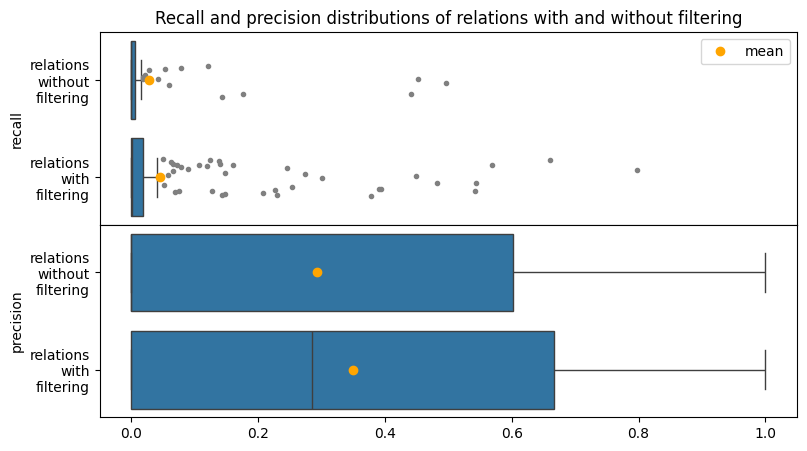

In [17]:
fig, axs = plt.subplots(nrows=2, sharex=True, figsize=(9, 5))

flierprops = {
     "marker": ".",
     "markeredgecolor": "gray",
     "markerfacecolor": "gray"
}

# recall
sns.boxplot(
    data=test_eval_taf,
    y="filtering_applied",
    x="recall",
    orient="h",
    flierprops=flierprops,
    ax=axs[0]
)

for l in axs[0].lines:
     if l.get_marker() != '':
          ys = l.get_ydata()
          ys += np.random.uniform(-0.2, 0.2, len(ys))
          l.set_ydata(ys)

mean_recall_no_filtering = test_eval_taf[~test_eval_taf["filtering_applied"]]["recall"].mean()
mean_recall_filtering = test_eval_taf[test_eval_taf["filtering_applied"]]["recall"].mean()

axs[0].plot(
    [mean_recall_no_filtering, mean_recall_filtering],
    [0, 1],
    color="orange",
    marker="o",
    linestyle=" ",
    label="mean"
)

axs[0].set_yticklabels(["relations\nwithout\nfiltering", "relations\nwith\nfiltering"])
axs[0].set_ylabel("recall")

axs[0].legend()

# precision
sns.boxplot(
    data=test_eval_taf,
    y="filtering_applied",
    x="precision",
    orient="h",
    flierprops=flierprops,
    ax=axs[1]
)

for l in axs[1].lines:
     if l.get_marker() != '':
          ys = l.get_ydata()
          ys += np.random.uniform(-0.2, 0.2, len(ys))
          l.set_ydata(ys)

mean_precision_no_filtering = test_eval_taf[~test_eval_taf["filtering_applied"]]["precision"].mean()
mean_precision_filtering = test_eval_taf[test_eval_taf["filtering_applied"]]["precision"].mean()

axs[1].plot(
    [mean_precision_no_filtering, mean_precision_filtering],
    [0, 1],
    color="orange",
    marker="o",
    linestyle=" ",
    label="mean"
)

axs[1].set_yticklabels(["relations\nwithout\nfiltering", "relations\nwith\nfiltering"])
axs[1].set_ylabel("precision")
axs[1].set_xlabel("")

axs[0].set_title("Recall and precision distributions of relations with and without filtering")

fig.subplots_adjust(hspace=0)

plt.show()

In [18]:
print(mean_recall_no_filtering)
print(mean_recall_filtering)
print(mean_precision_no_filtering)
print(mean_precision_filtering)

0.02825805728802887
0.04464089528825503
0.2936098215594266
0.3499372366229736


## Export modified evaluation results for ComplEx_Ruffinelli_spo model

The evaluation results for the model **ComplEx_Ruffinelli_spo with relation filtering and threshold determination after filtering** are exported, together with the number of positive triples in the training and validation datasets and a variable that indicates if filtering was applied to the respective relation.

In [19]:
# export evaluation results to csv file

test_eval_taf = test_eval_taf[["property", "recall", "precision", "f1", "accuracy", "n_triples_val", "n_triples_train", "filtering_applied"]]
test_eval_taf["filtering_applied"] = test_eval_taf["filtering_applied"].astype(int)
test_eval_taf = test_eval_taf.sort_values("recall", ascending=False)
test_eval_taf = test_eval_taf.round(3)
test_eval_taf["property"] = test_eval_taf["property"].str.replace("http://dbpedia.org/ontology/", "dbo:")

test_eval_taf.to_csv("complEx_ruffinelli_spo_test_evaluation.csv", index=False)

## Manually evaluating predictions on unlabeled test dataset

Below, the entity pairs of the unlabeled test data are shown, together with the predicted relationships and a lits of relationships that are allowed by the relation filter. The output was used to create the evaluation table containing the manual evaluation in the thesis. The results are only shown in the thesis itself.

In [20]:
unlabeled_test_filter = pd.read_csv("../data/processed_data/unlabeled_test_filter.csv")
props = np.setdiff1d(unlabeled_test_filter.columns, ["subject", "object"])
unfiltered_props = props[(unlabeled_test_filter[props].sum() == len(unlabeled_test_filter))]
unlabeled_test_filter = unlabeled_test_filter[np.setdiff1d(unlabeled_test_filter.columns, unfiltered_props)]

In [21]:
unlabeled_test_data_predictions = pd.read_csv(
    "../data/predictions/complEx_ruffinelli_hrt_makeshift_preds/test_unlabeled_predictions_taf.csv"
)

props = np.setdiff1d(unlabeled_test_data_predictions.columns, ["subject", "object"])

unlabeled_test_data_predictions_latex_ready_table = pd.DataFrame(columns=["subject", "object", "predictions"])

for idx, row in unlabeled_test_data_predictions.iterrows():
    subject = row['subject']
    object = row['object']
    relations = list(row[props][row[props] == 1].index)

    #  allowed props
    allowed_props = unlabeled_test_filter[(unlabeled_test_filter["subject"] == subject) & (unlabeled_test_filter["object"] == object)].iloc[0]
    allowed_props = list(allowed_props[allowed_props == 1].index)

    print(f"{idx+1})\tsubject: {subject}")
    print(f"\tobject: {object}")
    print(f"\tpredicted relations: {list(row[props][row[props] == 1].index)}")
    print("\tallowed properties:")
    for prop in allowed_props:
        print(f"\t\t- {prop.replace('http://dbpedia.org/ontology/', '')}")   
    print()

    unlabeled_test_data_predictions_latex_ready_table = unlabeled_test_data_predictions_latex_ready_table._append(
        {
            "subject": subject.replace("http://dbpedia.org/resource/", "dbr:").replace("_", "\_") + " ",
            "object": " " + object.replace("http://dbpedia.org/resource/", "dbr:").replace("_", "\_") + " ",
            "predictions": " " + "\newline ".join([rel.replace("http://dbpedia.org/ontology/", "dbo:").replace("_", "\_") for rel in relations]) + r"\\\hline"},
        ignore_index=True
    )

unlabeled_test_data_predictions_latex_ready_table.to_csv("complEx_ruffinelli_spo_unlabeled_test_evaluation.csv", sep="&", index=False)

1)	subject: http://dbpedia.org/resource/12B
	object: http://dbpedia.org/resource/Mayilsamy
	predicted relations: ['http://dbpedia.org/ontology/starring']
	allowed properties:
		- author
		- chairman
		- cinematography
		- coach
		- commander
		- composer
		- coverArtist
		- designer
		- director
		- discoverer
		- editing
		- executiveProducer
		- firstLeader
		- founder
		- keyPerson
		- leader
		- musicComposer
		- narrator
		- president
		- secondLeader
		- starring
		- translator
		- voice
		- writer

2)	subject: http://dbpedia.org/resource/1975_New_Year_Honours_(New_Zealand)
	object: http://dbpedia.org/resource/Miriam_Dell
	predicted relations: []
	allowed properties:
		- agency
		- archipelago
		- architecturalStyle
		- assembly
		- author
		- bandMember
		- binomialAuthority
		- board
		- bronzeMedalist
		- campus
		- chairman
		- champion
		- championInDoubleFemale
		- championInDoubleMale
		- championInMixedDouble
		- championInSingleFemale
		- championInSingleMale
		- child
	